In [1]:
import time
import torch
import numpy as np
from multiprocessing import Pool

#from ENV import KYenv
from env import Env
from controller_vbc import VDN_MAC
from q_learner_vdn_vbc import QLearner
from run import run
from parallel_run_kit import ParallelRun

import matplotlib.pyplot as plt

In [2]:
# Generate the original position of UEs

#t_ues = torch.rand(10, 2) * torch.Tensor([40, 40])
'''
tensor([[14.6263, 34.7260],
        [ 1.9140, 21.8183],
        [ 2.2632, 30.5218],
        [ 0.6944, 11.3171],
        [22.5929, 38.7681],
        [23.7638, 17.0285],
        [ 6.9659,  8.9016],
        [12.5943, 38.1162],
        [36.4007,  4.6886],
        [21.0985,  6.8055]])

'''
#print(t_ues)
'''
t_ues = torch.tensor([[ 2.3219, 35.5963],
        [ 4.9058,  7.3772],
        [34.1434, 36.6237],
        [30.3456, 22.6366],
        [26.9608, 20.9890],
        [19.3620, 32.8353],
        [12.3929, 39.7321],
        [ 5.9339, 29.5289],
        [33.2905, 37.5042],
        [ 9.2728, 15.3940]])
'''

t_ues = []
#seeds = [0, 5, 3, 6, 9, 14, 16, 25, 22, 29]
#seeds = [0, 5, 3, 25, 22, 29]
#for i in seeds:
#    torch.manual_seed(i)
#    t_ues.append(torch.rand(10, 2) * torch.Tensor([40, 40]))

torch.manual_seed(3)
t_ues = torch.rand(10, 2) * torch.Tensor([40, 40])
torch.manual_seed(time.time())

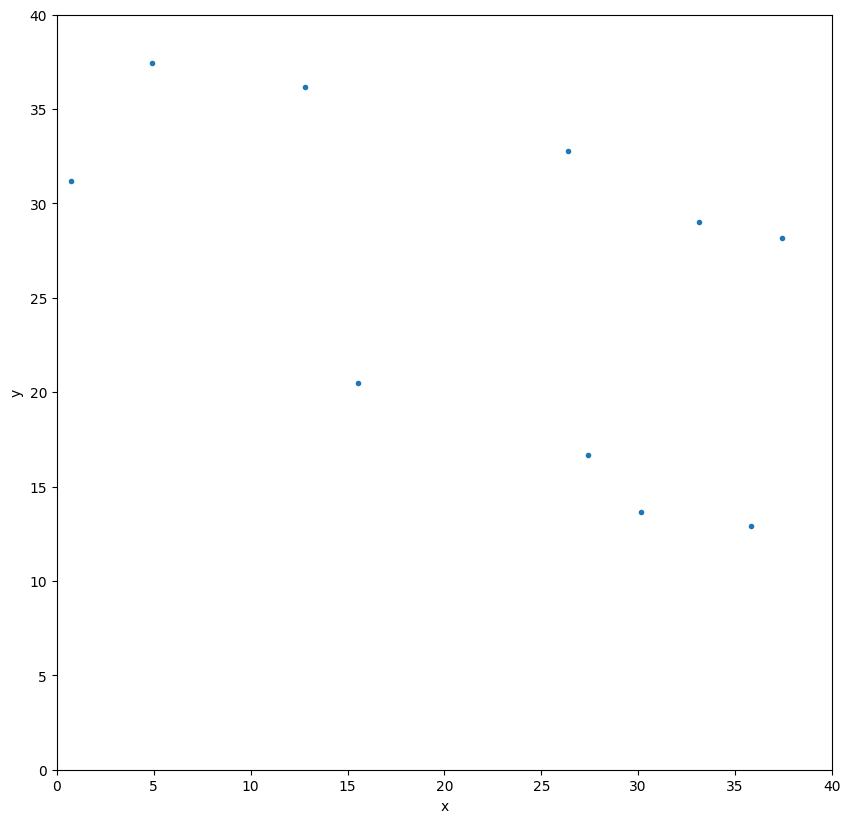

In [47]:
# draw UEs position

plt.figure(dpi=100, figsize=[10, 10])
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.plot(t_ues[:, 0], t_ues[:, 1], '.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [18]:
# initialize environments, agents and learner

# initialize environment
#env = KYenv(4, 24, 500)
rw = 0.01
noise_dbm = -85.
env = Env(border=torch.Tensor([40, 40]), 
          enbs = torch.Tensor([[10, 10, 10], 
                               [10, 30, 10], 
                               [10, 10, 30],
                               [10, 30, 30]]), 
          ues = t_ues, 
          noise = 10**(noise_dbm / 10. - 3.),
          rw = rw
          )
'''
env2 = Env(border=torch.Tensor([40, 40]), 
          enbs = torch.Tensor([[10, 10, 10], 
                               [10, 30, 10], 
                               [10, 10, 30],
                               [10, 30, 30]]), 
          ues = t_ues_2, 
          noise = 10**(noise_dbm / 10. - 3.),
          rw = rw
          )
'''

# set saving directory/name
filename = 'AP4UE10L40RW1IR0NOI85SEED_set6_transeed3_nocommu_706_726_lr00001_rms_ep2'
xx = torch.load('exp_res/AP4UE10L40RW1IR0NOI85SEED_set6_nocommu_706.pth')
# enable cuda in training
cuda_flag = True

# initialize learner
controller = VDN_MAC(n_agents = 4) #n_actions = 6 * 5, input_shape = 11
#controller.save('state_dicts/' + filename + '.pth') # save
controller.agent.load_state_dict(xx['net_sd']['agent'])
controller.env_blender.load_state_dict(xx['net_sd']['blender'])
learner = QLearner(controller, info_reg = 0.0)
learner.mixer.load_state_dict(xx['qmixer'])
if cuda_flag:
    learner.cuda()

# initialize test learner
test_controller = VDN_MAC(n_agents = 4) #n_actions = 6 * 5, input_shape = 11, n_size = 256
#test_controller.load('state_dicts/' + filename + '.pth')
test_controller.agent.load_state_dict(xx['net_sd']['agent'])
test_controller.env_blender.load_state_dict(xx['net_sd']['blender'])
for par in test_controller.env_blender.parameters():
    par.requires_grad = False
for par in test_controller.agent.parameters():
    par.requires_grad = False

In [6]:
t_ues_2 = torch.tensor([[ 2.3219, 35.5963],
        [ 4.9058,  7.3772],
        [34.1434, 36.6237],
        [30.3456, 22.6366],
        [26.9608, 20.9890],
        [19.3620, 32.8353],
        [12.3929, 39.7321],
        [ 5.9339, 29.5289],
        [33.2905, 37.5042],
        [ 9.2728, 15.3940]])
env2 = Env(border=torch.Tensor([40, 40]), 
          enbs = torch.Tensor([[10, 10, 10], 
                               [10, 30, 10], 
                               [10, 10, 30],
                               [10, 30, 30]]), 
          ues = t_ues_2, 
          noise = 10**(noise_dbm / 10. - 3.),
          rw = rw
          )

In [19]:
#epi_length = 0
#epi_length_step = 100

# set batch size
batch_size = 10

# initialze reward and loss saving container
r_history = []
loss_history = []
mess_history = []

In [6]:
r_history2 = []

0
loss:  0.20156796276569366    grad:  1.713977336883545
1
loss:  0.1808353066444397    grad:  2.6519010066986084
2
loss:  0.18696129322052002    grad:  1.7237197160720825
3
loss:  0.19089959561824799    grad:  1.6324684619903564
4
loss:  0.18264441192150116    grad:  1.6666491031646729
5
loss:  0.1810344010591507    grad:  2.173672914505005
6
loss:  0.19844995439052582    grad:  2.44142484664917
7
loss:  0.20199750363826752    grad:  2.1146762371063232
8
loss:  0.2054351568222046    grad:  2.582920789718628
9
loss:  0.17986127734184265    grad:  1.8037629127502441


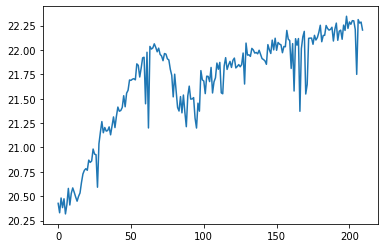

10
loss:  0.19364933669567108    grad:  1.655185341835022
11
loss:  0.19594287872314453    grad:  2.2535088062286377
12
loss:  0.19281363487243652    grad:  1.4887614250183105
13
loss:  0.18916191160678864    grad:  1.624078631401062
14
loss:  0.1886916607618332    grad:  1.666847825050354
15
loss:  0.19359296560287476    grad:  1.9865206480026245
16
loss:  0.21420051157474518    grad:  1.8365494012832642
17
loss:  0.2001899778842926    grad:  2.3259963989257812
18
loss:  0.1923673152923584    grad:  1.8143131732940674
19
loss:  0.18457067012786865    grad:  2.4567368030548096


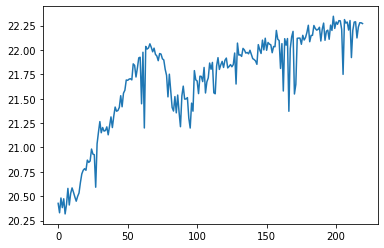

20
loss:  0.18611277639865875    grad:  4.71424674987793
21
loss:  0.18042200803756714    grad:  5.959444999694824
22
loss:  0.17883768677711487    grad:  4.294839859008789
23
loss:  0.2032080441713333    grad:  2.0632357597351074
24
loss:  0.18370500206947327    grad:  1.7321994304656982
25
loss:  0.18828453123569489    grad:  2.7078661918640137
26
loss:  0.18532882630825043    grad:  1.451535701751709
27
loss:  0.17867906391620636    grad:  2.020758628845215
28
loss:  0.18860451877117157    grad:  1.6851447820663452
29
loss:  0.17964020371437073    grad:  1.4768362045288086


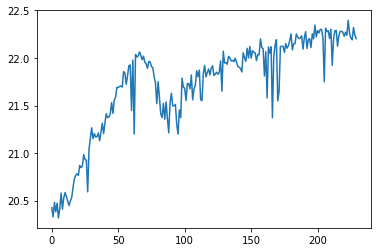

30
loss:  0.18247823417186737    grad:  1.5496870279312134
31
loss:  0.19853238761425018    grad:  1.7670093774795532
32
loss:  0.19797614216804504    grad:  5.3914995193481445
33
loss:  0.18051746487617493    grad:  3.8590030670166016
34
loss:  0.1770877242088318    grad:  2.0302774906158447
35
loss:  0.19358833134174347    grad:  1.8195687532424927
36
loss:  0.18191242218017578    grad:  1.9763445854187012
37
loss:  0.1865132749080658    grad:  4.6302876472473145
38
loss:  0.16957855224609375    grad:  3.6043665409088135
39
loss:  0.1860198825597763    grad:  2.130573034286499


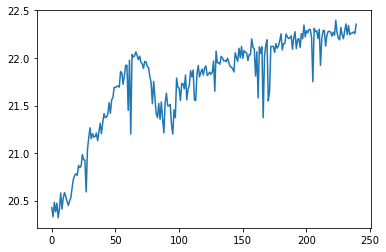

40
loss:  0.17817355692386627    grad:  1.4999226331710815
41
loss:  0.17485250532627106    grad:  1.8947044610977173
42
loss:  0.18022651970386505    grad:  2.7904765605926514
43
loss:  0.1777842938899994    grad:  2.507021903991699
44
loss:  0.16996091604232788    grad:  1.3120555877685547
45
loss:  0.17405758798122406    grad:  1.9915326833724976
46
loss:  0.18236562609672546    grad:  4.276298999786377
47
loss:  0.16594839096069336    grad:  5.720754146575928
48
loss:  0.16942614316940308    grad:  1.3773956298828125
49
loss:  0.1774321049451828    grad:  2.6633307933807373


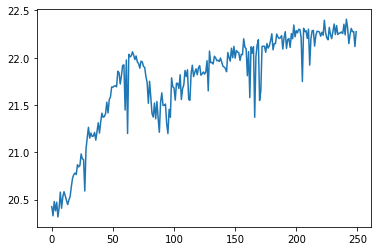

50
loss:  0.1856261044740677    grad:  1.9100805521011353
51
loss:  0.18280181288719177    grad:  1.925000786781311
52
loss:  0.1731809675693512    grad:  1.306474208831787
53
loss:  0.17752066254615784    grad:  2.1839375495910645
54
loss:  0.18076471984386444    grad:  1.9546045064926147
55
loss:  0.17875397205352783    grad:  4.051327228546143
56
loss:  0.16974696516990662    grad:  1.8665534257888794
57
loss:  0.1798584908246994    grad:  1.3752042055130005
58
loss:  0.17580366134643555    grad:  1.9926773309707642
59
loss:  0.1712869554758072    grad:  3.103097915649414


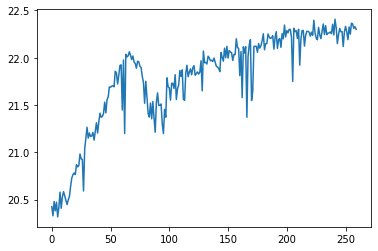

60
loss:  0.16371002793312073    grad:  3.1833949089050293
61
loss:  0.1872130185365677    grad:  4.576284408569336
62
loss:  0.1822938323020935    grad:  1.8072078227996826
63
loss:  0.18416576087474823    grad:  1.5145384073257446
64
loss:  0.16637423634529114    grad:  3.6791884899139404
65
loss:  0.17508408427238464    grad:  2.129610776901245
66
loss:  0.19410301744937897    grad:  3.4152729511260986
67
loss:  0.18488158285617828    grad:  5.065181255340576
68
loss:  0.192402184009552    grad:  5.786341667175293
69
loss:  0.15949779748916626    grad:  4.67055082321167


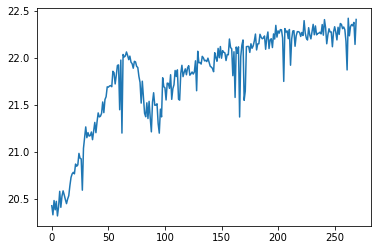

70
loss:  0.1817806512117386    grad:  3.757192611694336
71
loss:  0.1728774905204773    grad:  2.763159990310669
72
loss:  0.1707794964313507    grad:  2.817950487136841
73
loss:  0.17958243191242218    grad:  1.945313811302185
74
loss:  0.1737053543329239    grad:  1.5905687808990479
75
loss:  0.16066737473011017    grad:  1.787123680114746
76
loss:  0.1679859608411789    grad:  2.0182676315307617
77
loss:  0.18632854521274567    grad:  3.0797691345214844
78
loss:  0.16595210134983063    grad:  1.495894193649292
79
loss:  0.16110695898532867    grad:  1.972186803817749


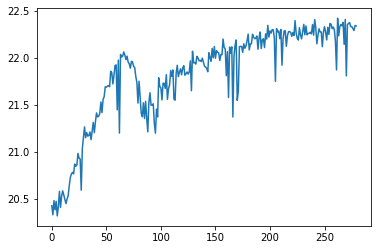

80
loss:  0.18445564806461334    grad:  5.502554416656494
81
loss:  0.16713084280490875    grad:  6.105756759643555
82
loss:  0.1633855402469635    grad:  1.8852475881576538
83
loss:  0.16699066758155823    grad:  1.294663906097412
84
loss:  0.16028273105621338    grad:  2.0219478607177734
85
loss:  0.1604393720626831    grad:  1.2655538320541382
86
loss:  0.16804714500904083    grad:  2.666626453399658
87
loss:  0.1690298467874527    grad:  1.992197036743164
88
loss:  0.1645437628030777    grad:  1.3410530090332031
89
loss:  0.17105889320373535    grad:  1.504913091659546


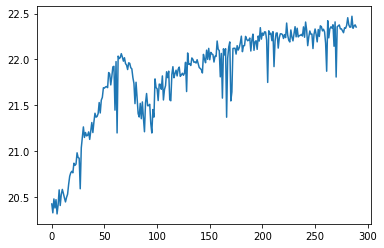

90
loss:  0.16453039646148682    grad:  1.6539649963378906
91
loss:  0.15768840909004211    grad:  2.7611680030822754
92
loss:  0.15792490541934967    grad:  2.5965840816497803
93
loss:  0.16083072125911713    grad:  1.252068281173706
94
loss:  0.16503040492534637    grad:  2.46183443069458
95
loss:  0.15187889337539673    grad:  5.086146831512451
96
loss:  0.156550794839859    grad:  2.654883623123169
97
loss:  0.16162779927253723    grad:  1.3859496116638184
98
loss:  0.15912075340747833    grad:  2.198275327682495
99
loss:  0.16346785426139832    grad:  1.544676661491394


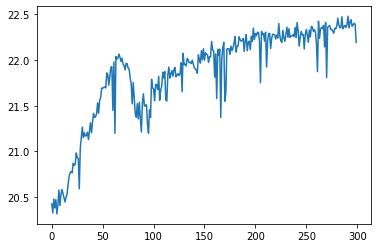

100
loss:  0.15893276035785675    grad:  1.6500028371810913
101
loss:  0.14944152534008026    grad:  3.389880895614624
102
loss:  0.15773142874240875    grad:  2.497925281524658
103
loss:  0.16201280057430267    grad:  3.181849718093872
104
loss:  0.15802980959415436    grad:  1.824281096458435
105
loss:  0.16043154895305634    grad:  2.2093076705932617
106
loss:  0.1549329161643982    grad:  1.373000979423523
107
loss:  0.16280530393123627    grad:  1.2218626737594604
108
loss:  0.16766022145748138    grad:  1.5859673023223877
109
loss:  0.15024682879447937    grad:  3.8420777320861816


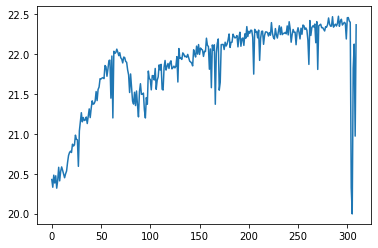

110
loss:  0.15212304890155792    grad:  2.1912291049957275
111
loss:  0.16110312938690186    grad:  1.3192161321640015
112
loss:  0.15569782257080078    grad:  1.5828416347503662
113
loss:  0.15595108270645142    grad:  1.9825934171676636
114
loss:  0.1807146817445755    grad:  1.7144442796707153
115
loss:  0.16369716823101044    grad:  1.240574836730957
116
loss:  0.16434477269649506    grad:  2.883939743041992
117
loss:  0.14472924172878265    grad:  3.6789917945861816
118
loss:  0.16306540369987488    grad:  1.3731074333190918
119
loss:  0.1590854525566101    grad:  1.5462596416473389


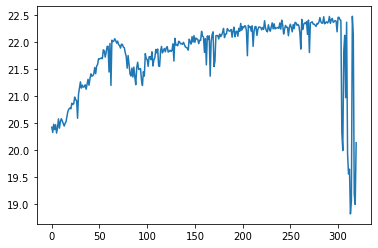

120
loss:  0.159458190202713    grad:  1.4161230325698853
121
loss:  0.1489778310060501    grad:  2.5635764598846436
122
loss:  0.16962745785713196    grad:  2.8471057415008545
123
loss:  0.14806492626667023    grad:  1.5087828636169434
124
loss:  0.14776024222373962    grad:  1.0669622421264648
125
loss:  0.16314628720283508    grad:  1.3656519651412964
126
loss:  0.1508246213197708    grad:  2.0038909912109375
127
loss:  0.1444888561964035    grad:  1.3906689882278442
128
loss:  0.16730250418186188    grad:  1.678145408630371
129
loss:  0.1442045420408249    grad:  2.230546236038208


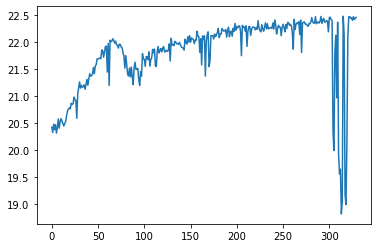

130
loss:  0.14023321866989136    grad:  1.0426820516586304
131
loss:  0.14930671453475952    grad:  1.1079462766647339
132
loss:  0.13915599882602692    grad:  1.208018183708191
133
loss:  0.1606101393699646    grad:  1.2559388875961304
134
loss:  0.1489330381155014    grad:  1.4012318849563599
135
loss:  0.16169150173664093    grad:  1.6136316061019897
136
loss:  0.151813343167305    grad:  3.172954797744751
137
loss:  0.14089453220367432    grad:  3.3446342945098877
138
loss:  0.15173198282718658    grad:  1.1393420696258545
139
loss:  0.13981999456882477    grad:  1.4655544757843018


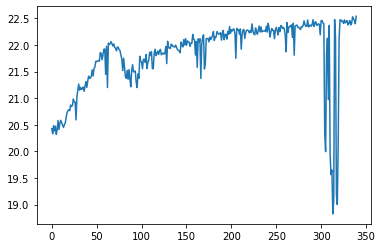

140
loss:  0.15403984487056732    grad:  2.6014742851257324
141
loss:  0.1417912393808365    grad:  3.587664842605591
142
loss:  0.1444459706544876    grad:  1.0972228050231934
143
loss:  0.14992980659008026    grad:  2.364748477935791
144
loss:  0.13618239760398865    grad:  1.396265983581543
145
loss:  0.15342895686626434    grad:  1.8886297941207886
146
loss:  0.14442826807498932    grad:  1.164350986480713
147
loss:  0.14823423326015472    grad:  1.8021687269210815
148
loss:  0.14084841310977936    grad:  1.4116359949111938
149
loss:  0.142727792263031    grad:  1.5603625774383545


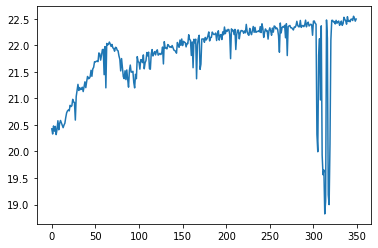

150
loss:  0.14147542417049408    grad:  1.0237723588943481
151
loss:  0.14903660118579865    grad:  1.8446565866470337
152
loss:  0.16027356684207916    grad:  1.9110363721847534
153
loss:  0.1400003731250763    grad:  2.1171977519989014
154
loss:  0.1390552520751953    grad:  2.162752866744995
155
loss:  0.14430151879787445    grad:  2.163783311843872
156
loss:  0.14903773367404938    grad:  2.4197044372558594
157
loss:  0.1437055766582489    grad:  1.3828355073928833
158
loss:  0.14153282344341278    grad:  1.2091314792633057
159
loss:  0.1527286022901535    grad:  2.253899574279785


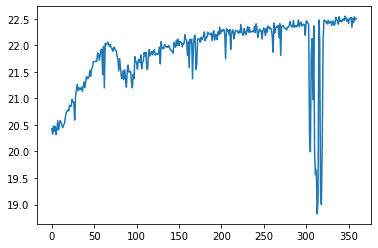

160
loss:  0.14596019685268402    grad:  1.108496069908142
161
loss:  0.13940517604351044    grad:  1.0953162908554077
162
loss:  0.1444893479347229    grad:  1.0156549215316772
163
loss:  0.14091360569000244    grad:  1.15456223487854
164
loss:  0.13726921379566193    grad:  1.928948998451233
165
loss:  0.14588280022144318    grad:  1.3175287246704102
166
loss:  0.14755591750144958    grad:  1.248650312423706
167
loss:  0.13624845445156097    grad:  3.984617233276367
168
loss:  0.14291870594024658    grad:  3.293029308319092
169
loss:  0.13390851020812988    grad:  1.2247234582901


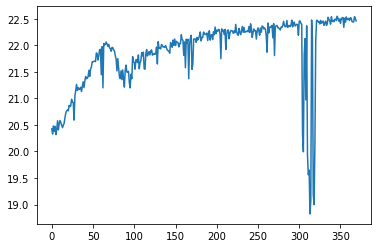

170
loss:  0.13831602036952972    grad:  1.4995039701461792
171
loss:  0.14281737804412842    grad:  2.9316184520721436
172
loss:  0.15305489301681519    grad:  1.2174688577651978
173
loss:  0.15329043567180634    grad:  1.2565135955810547
174
loss:  0.14481113851070404    grad:  2.0913074016571045
175
loss:  0.13630710542201996    grad:  1.7596272230148315
176
loss:  0.1378631740808487    grad:  1.1148930788040161
177
loss:  0.1352585256099701    grad:  1.5381217002868652
178
loss:  0.1394600123167038    grad:  1.9991371631622314
179
loss:  0.13326112926006317    grad:  1.4184645414352417


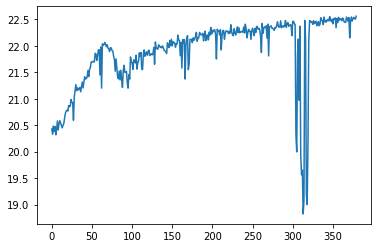

180
loss:  0.1387263387441635    grad:  1.229947566986084
181
loss:  0.16022275388240814    grad:  1.4013056755065918
182
loss:  0.14661896228790283    grad:  3.127831220626831
183
loss:  0.12683315575122833    grad:  1.8657711744308472
184
loss:  0.13378402590751648    grad:  1.328527808189392
185
loss:  0.1329578012228012    grad:  1.4395167827606201
186
loss:  0.13983914256095886    grad:  1.1602519750595093
187
loss:  0.14939844608306885    grad:  1.3210667371749878
188
loss:  0.12750594317913055    grad:  1.4050098657608032
189
loss:  0.12404525279998779    grad:  0.9723514914512634


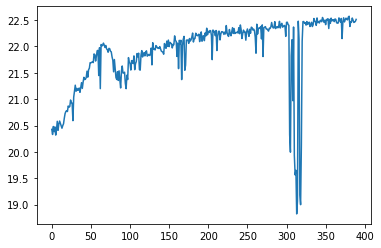

190
loss:  0.13815851509571075    grad:  1.7092746496200562
191
loss:  0.127654567360878    grad:  1.430058240890503
192
loss:  0.1328439563512802    grad:  0.9447889924049377
193
loss:  0.12977243959903717    grad:  2.303335428237915
194
loss:  0.13710971176624298    grad:  2.988359212875366
195
loss:  0.14693647623062134    grad:  2.5704870223999023
196
loss:  0.1276799887418747    grad:  2.7044191360473633
197
loss:  0.12574057281017303    grad:  1.9309338331222534
198
loss:  0.1229267492890358    grad:  2.1052968502044678
199
loss:  0.1300077885389328    grad:  2.55901837348938


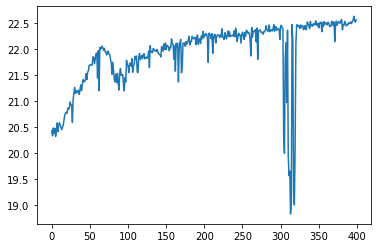

In [21]:
# set the length of one sample
# the environment will be stopped after 500 steps
# 1 sample = 500 steps
epi_length = 500
commu_flag = False

# set the learning rate
#learner.set_adam(0.00002)
#learner.set_sgd(0.00002)
#learner.set_rms(0.00001)


# Training START!
for episode in range(200): # train 100 episode at a time, so I can change the hyperparameters every 100 episodes
    print(episode)
    if episode % 2000 == 0: # the 'if clause' only is True when episode == 0, now.
        #epi_length += 100
        #print(epi_length)
        
        # set/initialize parallel runner, it helps run 'batch size'(8) samples in one episode.
        # explore_episilon is the epsilon greedy parameter, 1.0 for all exploration, 0.0 for no exploration
        runner = ParallelRun(env, test_controller, epi_length, explore_epsilon=0.2, test_mode = False, commu = commu_flag)
        test_runner = ParallelRun(env, test_controller, epi_length, test_mode = True, commu = commu_flag)
        #test_runner2 = ParallelRun(env2, test_controller, epi_length, test_mode = True, commu = commu_flag)
    
    # The following line and the line follows the following line is equivalent, they are sampling 8 samples
    #batch = [run(env, test_controller, epi_length, explore_epsilon=0., test_mode = False, 
    #             commu = commu_flag, seed_i = torch.tensor(ii)) for ii in range(6)]
    batch = runner.run(batch_size)
    # Transform the training data into a convenient formation.
    for key in batch[0].keys():
        batch[0][key] = torch.stack([batch[i][key] for i in range(batch_size)], dim=0)
        if cuda_flag:
            batch[0][key] = batch[0][key].cuda()
    batch = batch[0]

    # train one step. At the same time, check the training loss and the norm of grad.
    if commu_flag:
        loss, grad, diff = learner.train(batch, commu=commu_flag)
    else:
        loss, grad = learner.train(batch, commu=commu_flag)
    #loss, grad = learner.train(batch, commu=True)
    # For DQN, it is necessary to update the target network, maybe not important for you
    learner._update_targets()

    # Save the results
    loss_history.append(loss)
    if commu_flag:
        mess_history.append(diff)
        print('loss: ', loss.item(), '   grad: ', grad.item(), '   mess: ', diff.item())
    else:
        print('loss: ', loss.item(), '   grad: ', grad.item())

    # save and update the test controller
    controller.save('state_dicts/' + filename + '.pth')
    test_controller.load('state_dicts/' + filename + '.pth')

    # The test result also parallel in 8 samples, The following is the Test of the training model
    test = test_runner.run(10)
    #test = [run(env, test_controller, epi_length, test_mode = True, commu = commu_flag, seed_i = torch.tensor(ii)) for ii in range(6)]
    test = np.mean(test)
    # save test reward    
    r_history.append(test)
    
    #test = test_runner2.run(6)
    #test = np.mean(test)
    
    # save test reward
    #r_history2.append(test)

    # plot the test reward history every 10 episodes
    if episode % 10 == 9:
        #plt.figure(figsize = [16, 5])
        #plt.subplot(121)
        plt.plot(torch.tensor(r_history))
        #plt.subplot(122)
        #plt.plot(r_history2[:])
        plt.show()

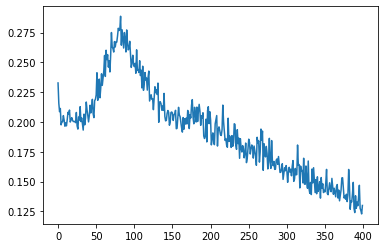

In [22]:
plt.plot(loss_history)

In [19]:
r_history[-1]

22.50745

In [36]:
#test_runner = ParallelRun(env, test_controller, epi_length, test_mode = True, commu = commu_flag)
#test = test_runner.run(20)
test = [run(env, test_controller, epi_length, test_mode = True, commu = commu_flag) for _ in range(20)]
print(np.mean(test))
print(test)

22.546797
[tensor(22.5828), tensor(22.5456), tensor(22.5609), tensor(22.3656), tensor(22.5405), tensor(22.5043), tensor(22.7164), tensor(22.3310), tensor(22.4904), tensor(22.5547), tensor(22.7446), tensor(22.5806), tensor(22.3906), tensor(22.5760), tensor(22.5671), tensor(22.5507), tensor(22.6361), tensor(22.5380), tensor(22.6067), tensor(22.5536)]


In [ ]:
22.513145

In [23]:
# model test
agent = test_controller

gamma = 0.98

rl = []

c = 0
c0 = 0

for _ in range(20):
    obs = env.reset()
    agent.init_hidden(1)
    r = 0

    for t in range(500):
        action = agent.choose_action(obs.unsqueeze(0), test_mode = True, commu = commu_flag)

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
        
        c += 1
        plan = torch.tensor(env.plan).tolist()
        if len(plan) == len(set(plan)):
            c0 += 1
    rl.append(r)

In [24]:
rl = torch.tensor(rl)
print(rl.mean())
print(torch.sqrt(rl.var()))

tensor(22.5796)
tensor(0.1015)


In [25]:
1 - c0 / c

0.012800000000000034

In [26]:
torch.save({
            'net_sd': {
                        'agent':controller.agent.state_dict(), 
                        'blender':controller.env_blender.state_dict()
                      },
            'qmixer': learner.mixer.state_dict(),
            'history':{
                        'rh':r_history,
                        'mh':mess_history,
                        'lh':loss_history,
                      },
            'parameters':{
                            'ini_pos': t_ues,
                            'commu_flag': commu_flag,
                            'RW': rw,
                            'noise_dbm': noise_dbm,
                         },
            'result':{
                        'rmean': rl.mean(),
                        'rsd': torch.sqrt(rl.var()),
                        'conflict_rate': 1 - c0 / c,
                     }
            }, 
            'exp_res/' + filename + '.pth')

In [28]:
batch['obs'][1,1]

tensor([[[ 0.0000e+00, -2.4565e-01, -1.4434e-01,  8.2620e-01],
         [ 1.0000e+00,  3.5833e-02, -2.2308e-01,  0.0000e+00],
         [ 2.0000e+00,  2.2171e-01, -1.8998e-01,  0.0000e+00],
         [ 6.0000e+00, -1.0021e-01,  1.5144e-01,  0.0000e+00],
         [ 7.0000e+00, -1.9582e-01,  2.0947e-01,  0.0000e+00]],

        [[ 1.0000e+00, -4.6417e-01, -2.2308e-01,  0.0000e+00],
         [ 2.0000e+00, -2.7829e-01, -1.8998e-01,  0.0000e+00],
         [ 3.0000e+00,  2.1928e-02,  4.9375e-01,  1.2327e-03],
         [ 5.0000e+00, -2.9892e-01,  5.4960e-01,  2.6658e-02],
         [ 6.0000e+00, -6.0021e-01,  1.5144e-01,  0.0000e+00]],

        [[ 4.0000e+00,  3.4431e-01,  1.3787e-01,  1.2438e-01],
         [ 5.0000e+00,  2.0108e-01,  4.9602e-02,  2.6658e-02],
         [ 6.0000e+00, -1.0021e-01, -3.4856e-01,  0.0000e+00],
         [ 7.0000e+00, -1.9582e-01, -2.9053e-01,  0.0000e+00],
         [ 8.0000e+00, -7.4341e-02,  1.9910e-01,  0.0000e+00]],

        [[ 3.0000e+00,  2.1928e-02, -6.2525e-03, 

In [27]:
batch['obs'][0,1]

tensor([[[ 0.0000e+00, -2.4576e-01, -1.4439e-01,  8.2620e-01],
         [ 1.0000e+00,  3.5926e-02, -2.2313e-01,  0.0000e+00],
         [ 2.0000e+00,  2.2171e-01, -1.8983e-01,  0.0000e+00],
         [ 6.0000e+00, -1.0010e-01,  1.5147e-01,  0.0000e+00],
         [ 7.0000e+00, -1.9593e-01,  2.0947e-01,  0.0000e+00]],

        [[ 1.0000e+00, -4.6407e-01, -2.2313e-01,  0.0000e+00],
         [ 2.0000e+00, -2.7829e-01, -1.8983e-01,  0.0000e+00],
         [ 3.0000e+00,  2.1867e-02,  4.9367e-01,  1.2327e-03],
         [ 5.0000e+00, -2.9896e-01,  5.4952e-01,  2.6658e-02],
         [ 6.0000e+00, -6.0010e-01,  1.5147e-01,  0.0000e+00]],

        [[ 4.0000e+00,  3.4445e-01,  1.3782e-01,  1.2438e-01],
         [ 5.0000e+00,  2.0104e-01,  4.9519e-02,  2.6658e-02],
         [ 6.0000e+00, -1.0010e-01, -3.4853e-01,  0.0000e+00],
         [ 7.0000e+00, -1.9593e-01, -2.9053e-01,  0.0000e+00],
         [ 8.0000e+00, -7.4359e-02,  1.9910e-01,  0.0000e+00]],

        [[ 3.0000e+00,  2.1867e-02, -6.3254e-03, 

In [21]:
# heuristic test

gamma = 0.98

rl = []

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

c = 0
c0 = 0

for _ in range(50):
    obs = env.reset()
    r = 0

    for t in range(500):
        # 4, 5, 3
        action = []
        for i in range(4):
            temp = obs[i]
            dis = ((temp[:, 1:3])**2).sum(-1)
            inds = torch.argsort(dis)
            for j in inds:
                if temp[j, -1] < 3.:
                    break
            if temp[j, -1] >= 3.:
                j = torch.tensor(5)
            action.append(j.view(1))
        action = torch.cat(action)

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
        #print(r)
        
        c += 1
        plan = torch.tensor(env.plan).tolist()
        if len(plan) == len(set(plan)):
            c0 += 1
    rl.append(r)

In [22]:
rl = torch.tensor(rl)
print(rl.mean())
print(torch.sqrt(rl.var()))

tensor(19.7700)
tensor(3.9460)


In [23]:
1 - c0 / c

0.3318

In [64]:
# heuristic test 2

gamma = 0.98

rl = []

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

for _ in range(50):
    obs = env.reset() # 4, 5, 4
    r = 0

    for t in range(500):
        # 4, 5, 3
        action = []
        dist = (obs[:, :, 1:3] ** 2).sum(-1)
        inds = torch.argsort((obs[:, :, 1:3] ** 2).sum(-1), dim=1)
        action_pointer = torch.tensor([0, 0, 0, 0])
        for i in range(4):
            #print(i)
            while action_pointer[i] < 5 and obs[i, inds[i, action_pointer[i]], 3] >= 3.:
                action_pointer[i] += 1
        i = 0
        while i < 4:
            if action_pointer[i] == 5:
                i += 1
            else:
                dup_flag = False
                for j in range(4):
                    if i != j and action_pointer[j] != 5:
                        if obs[i, inds[i, action_pointer[i]], 0] == obs[j, inds[j, action_pointer[j]], 0]:
                            dup_flag = True
                            break
                if dup_flag:
                    dist_i = dist[i, inds[i, action_pointer[i]]]
                    dist_j = dist[j, inds[j, action_pointer[j]]]
                    if dist_i > dist_j:
                        j = i
                    action_pointer[j] += 1
                    while action_pointer[j] < 5 and obs[j, inds[j, action_pointer[j]], 3] >= 3.:
                        action_pointer[j] += 1
                    i = 0
                else:
                    i += 1
        action = [5 if action_pointer[i] == 5 else inds[i, action_pointer[i]] for i in range(4)]

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
        #print(r)

    rl.append(r)

In [65]:
rl = torch.tensor(rl)
print(rl.mean())
print(torch.sqrt(rl.var()))

tensor(24.5279)
tensor(0.0908)


In [11]:
# nearest test

gamma = 0.98

rl = []

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

for _ in range(20):
    obs = env.reset()
    r = 0

    for t in range(500):
        # 4, 5, 3
        action = []
        for i in range(4):
            temp = obs[i]
            dis = ((temp[:, 1:3])**2).sum(-1)
            inds = torch.argsort(dis)
            action.append(inds[0:1].view(1))
        action = torch.cat(action)
        #print(t)
        #print(obs)
        #print(action)
        #print(env.get_global_obs())
        #print(env.enbs_pos)

        obs, reward = env.step(action)
        r += (1 - gamma) * (reward - r)
    rl.append(r)

In [12]:
rl = torch.tensor(rl)
print(rl.mean())
print(rl.var())

tensor(9.4039)
tensor(9.5736e-13)


In [16]:
# constent test

gamma = 0.98

obs = env.reset()
r = 0

for t in range(50):
    action = torch.tensor([0, 0, 0, 0])
    print(env.MA_rate)

    obs, reward = env.step(action)
    r += (1 - gamma) * (reward - r)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
tensor([0.3532, 0.4781, 0.0000, 0.0000, 0.0000, 0.7600, 0.0000, 0.0000, 0.5405,
        0.0000])
tensor([0.6710, 0.9084, 0.0000, 0.0000, 0.0000, 1.4439, 0.0000, 0.0000, 1.0269,
        0.0000])
tensor([0.9571, 1.2956, 0.0000, 0.0000, 0.0000, 2.0595, 0.0000, 0.0000, 1.4647,
        0.0000])
tensor([1.2146, 1.6442, 0.0000, 0.0000, 0.0000, 2.6135, 0.0000, 0.0000, 1.8587,
        0.0000])
tensor([1.4463, 1.9578, 0.0000, 0.0000, 0.0000, 3.1121, 0.0000, 0.0000, 2.2133,
        0.0000])
tensor([1.6549, 2.2401, 0.0000, 0.0000, 0.0000, 3.5608, 0.0000, 0.0000, 2.5324,
        0.0000])
tensor([1.8426, 2.4942, 0.0000, 0.0000, 0.0000, 3.9647, 0.0000, 0.0000, 2.8197,
        0.0000])
tensor([2.0115, 2.7229, 0.0000, 0.0000, 0.0000, 4.3282, 0.0000, 0.0000, 3.0782,
        0.0000])
tensor([2.1635, 2.9287, 0.0000, 0.0000, 0.0000, 4.6553, 0.0000, 0.0000, 3.3108,
        0.0000])
tensor([2.3003, 3.1139, 0.0000, 0.0000, 0.0000, 4.9497, 0.0000, 0.0000, 3.5202

In [30]:
# first episode test, not important now, I guess
agent = test_controller
agent.init_hidden(1)

obs = torch.tensor([[[[0.2268, 0.1831, 0.0000],
          [0.5368, 0.1770, 0.0000],
          [0.1830, 0.7468, 0.0000],
          [0.0806, 0.3042, 0.0000],
          [0.4744, 0.7331, 0.0000]],

         [[0.2268, 0.1831, 0.0000],
          [0.5368, 0.1770, 0.0000],
          [0.8217, 0.0564, 0.0000],
          [0.7883, 0.2845, 0.0000],
          [0.9292, 0.6769, 0.0000]],

         [[0.1830, 0.7468, 0.0000],
          [0.0502, 0.8496, 0.0000],
          [0.0806, 0.3042, 0.0000],
          [0.4744, 0.7331, 0.0000],
          [0.4934, 0.9250, 0.0000]],

         [[0.1830, 0.7468, 0.0000],
          [0.7883, 0.2845, 0.0000],
          [0.4744, 0.7331, 0.0000],
          [0.9292, 0.6769, 0.0000],
          [0.4934, 0.9250, 0.0000]]]])

pos = torch.tensor([[0.25, 0.25], [0.75, 0.25], [0.25, 0.75], [0.75, 0.75]])

for i in range(4):
    x = obs[0][i]
    print(((x[:, :2]-pos[i])**2).sum(1))
    print(torch.argsort(((x[:, :2]-pos[i])**2).sum(1)))

agent.forward(obs)

tensor([0.0050, 0.0876, 0.2513, 0.0316, 0.2837])
tensor([0, 3, 1, 2, 4])
tensor([0.2782, 0.0508, 0.0426, 0.0027, 0.2144])
tensor([3, 2, 1, 4, 0])
tensor([0.0045, 0.0498, 0.2274, 0.0506, 0.0899])
tensor([0, 1, 3, 4, 2])
tensor([0.3215, 0.2182, 0.0762, 0.0375, 0.0965])
tensor([3, 2, 4, 1, 0])


(tensor([[[0.0536, 0.0370, 0.0519, 0.0680, 0.0526, 0.0566],
          [0.0637, 0.0394, 0.0660, 0.0668, 0.0602, 0.0531],
          [0.0502, 0.0304, 0.0648, 0.0611, 0.0620, 0.0331],
          [0.0537, 0.0373, 0.0598, 0.0683, 0.0571, 0.0551]]]),
 tensor([[[ 0.0628, -0.0453,  0.0867, -0.0275,  0.0460, -0.0757, -0.0337,
            0.0041, -0.0213, -0.0411,  0.0238, -0.0190,  0.0544,  0.0082,
           -0.0514, -0.0607,  0.0415, -0.0998,  0.0469, -0.0775,  0.0585,
            0.0104,  0.0288, -0.0002,  0.0504, -0.0654,  0.0628, -0.0554,
           -0.0609, -0.0271, -0.0159,  0.0404, -0.0322,  0.0530, -0.0361,
           -0.0637, -0.0486,  0.0100,  0.0101,  0.0223, -0.0347,  0.0004,
           -0.0024, -0.0378, -0.0458, -0.0320,  0.0265,  0.0273, -0.0461,
            0.0854,  0.0153,  0.0345,  0.0765, -0.0362, -0.0024,  0.0214,
           -0.0068, -0.0164,  0.0161,  0.0615, -0.0115, -0.0527,  0.0530,
           -0.0393],
          [ 0.0467, -0.0423,  0.0567, -0.0016,  0.0106, -0.0584, -0.05